In [2]:
library(readxl)
library( forecast )
library( lubridate )

Warning message:
“package ‘forecast’ was built under R version 3.4.4”
Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [3]:
df <- read_excel( '../data/6_ts/weekly-sales-differencing.xlsx')

In [68]:
summary( df )

     Week           Weekly Sales of a Cutting Tool First Difference
 Length:100         Min.   : 90.0                  Mode:logical    
 Class :character   1st Qu.:110.0                  NA's:100        
 Mode  :character   Median :123.0                                  
                    Mean   :120.0                                  
                    3rd Qu.:132.2                                  
                    Max.   :144.0                                  
 Second Difference
 Mode:logical     
 NA's:100         
                  
                  
                  
                  

In [5]:
df

Week,Weekly Sales of a Cutting Tool,First Difference,Second Difference
1,100,NA,NA
2,94,NA,NA
3,90,NA,NA
4,96,NA,NA
5,91,NA,NA
6,94,NA,NA
7,95,NA,NA
8,99,NA,NA
9,95,NA,NA
10,98,NA,NA


In [70]:
df.ts <- ts( df, start = c(2018, 1), end = c(2018, 48), frequency = 52 )

In [72]:
summary( df.ts )

      Week       Weekly Sales of a Cutting Tool First Difference
 Min.   : 1.00   Min.   : 90.0                  Min.   : NA     
 1st Qu.:12.75   1st Qu.: 98.0                  1st Qu.: NA     
 Median :24.50   Median :107.0                  Median : NA     
 Mean   :24.50   Mean   :107.9                  Mean   :NaN     
 3rd Qu.:36.25   3rd Qu.:118.2                  3rd Qu.: NA     
 Max.   :48.00   Max.   :129.0                  Max.   : NA     
                                                NA's   :48      
 Second Difference
 Min.   : NA      
 1st Qu.: NA      
 Median : NA      
 Mean   :NaN      
 3rd Qu.: NA      
 Max.   : NA      
 NA's   :48       

In [92]:
df.arima <- read_excel( '../data/6_ts/quarterly-sales.xlsx')

In [95]:
df.arima$Sales

[1] 362 385 432 341 382 409 498 387 473 513 582 474 544 582 681 557 628 707 773
[20] 592 627 725 854 661

In [97]:
df.arima <- ts( df.arima$Sales, start = c( 1,1), frequency = 4 )

In [103]:
stl(df.arima, s.window=11)

 Call:
 stl(x = df.arima, s.window = 11)

Components
       seasonal    trend   remainder
1 Q1 -18.200900 371.5605   8.6403623
1 Q2   8.729057 376.9424  -0.6714783
1 Q3  73.412385 382.8993 -24.3116407
1 Q4 -63.925444 388.7501  16.1753139
2 Q1 -19.442702 399.6637   1.7790305
2 Q2   9.422090 411.7316 -12.1536705
2 Q3  75.628872 429.2992  -6.9280981
2 Q4 -65.516045 455.0861  -2.5700430
3 Q1 -20.704637 479.3878  14.3168387
3 Q2  10.158370 499.6060   3.2355990
3 Q3  77.921665 518.5510 -14.4726695
3 Q4 -67.072947 537.4912   3.5817133
4 Q1 -23.472002 558.2986   9.1734343
4 Q2  11.342724 579.6653  -9.0080345
4 Q3  82.334508 601.1225  -2.4570016
4 Q4 -69.665248 627.8002  -1.1349107
5 Q1 -26.437418 655.2224  -0.7850206
5 Q2  12.400608 672.3393  22.2601295
5 Q3  86.693219 676.4389   9.8678990
5 Q4 -72.215867 675.3216 -11.1057603
6 Q1 -27.908161 686.1528 -31.2446054
6 Q2  12.926586 709.3544   2.7189784
6 Q3  88.548090 731.4211  34.0307628
6 Q4 -73.295309 754.9390 -20.6437308

In [104]:
diff( df.arima, 1 )

  Qtr1 Qtr2 Qtr3 Qtr4
1        23   47  -91
2   41   27   89 -111
3   86   40   69 -108
4   70   38   99 -124
5   71   79   66 -181
6   35   98  129 -193

In [124]:
fit <- arima(df.arima, order = c(1,0,0), seasonal = list(order = c(1,1,0)))

In [125]:
forecast( fit, 1)

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
7 Q1       698.7886 661.3622 736.2149 641.5499 756.0273

In [126]:
summary( fit )


Call:
arima(x = df.arima, order = c(1, 0, 0), seasonal = list(order = c(1, 1, 0)))

Coefficients:
         ar1     sar1
      0.9306  -0.2258
s.e.  0.0673   0.2851

sigma^2 estimated as 852.9:  log likelihood = -96.82,  aic = 199.64

Training set error measures:
                   ME    RMSE      MAE     MPE     MAPE      MASE       ACF1
Training set 7.095362 26.6599 19.02455 1.17742 3.199206 0.2284933 0.01629922


In [134]:
df.sa <- read_excel('../data/6_ts/champagne-sales.xlsx')

In [132]:
df.sa

Month,Champagne Sales
1-01,2851
1-02,2672
1-03,2755
1-04,2721
1-05,2946
1-06,3036
1-07,2282
1-08,2212
1-09,2922
1-10,4301


In [139]:
df.sa <- ts( df.sa[,2], start = c(1,1), end = c(8,12), frequency = 12 )

In [149]:
fit <- arima( window(df.sa, start=c(1,1), end=c(8,6)), order = c(1,0,0), seasonal = list(order = c(1,1,0)))

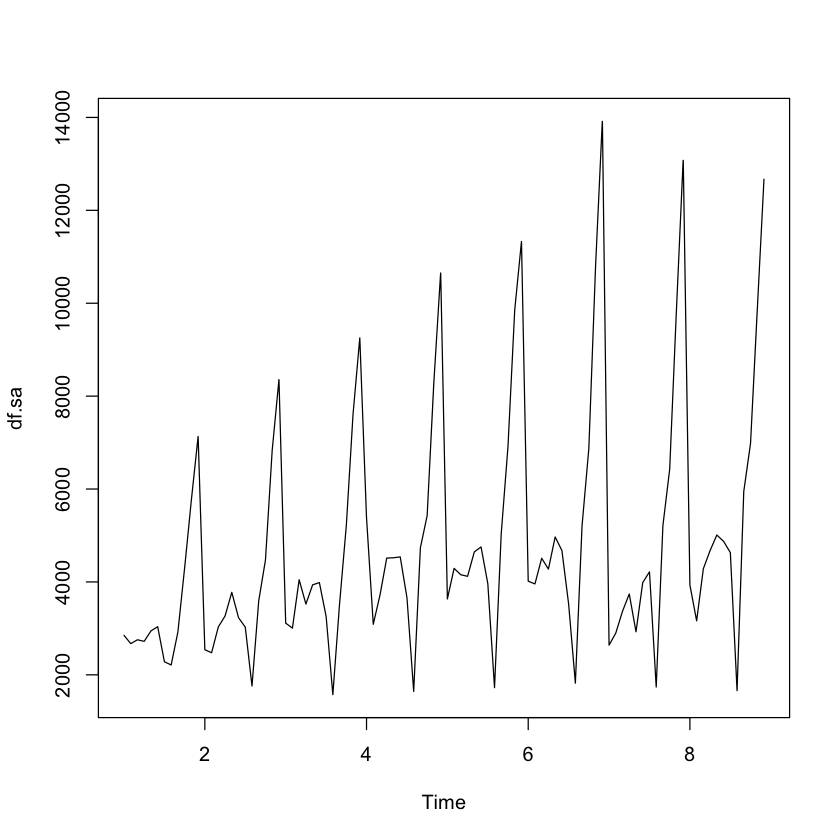

In [151]:
plot( df.sa )

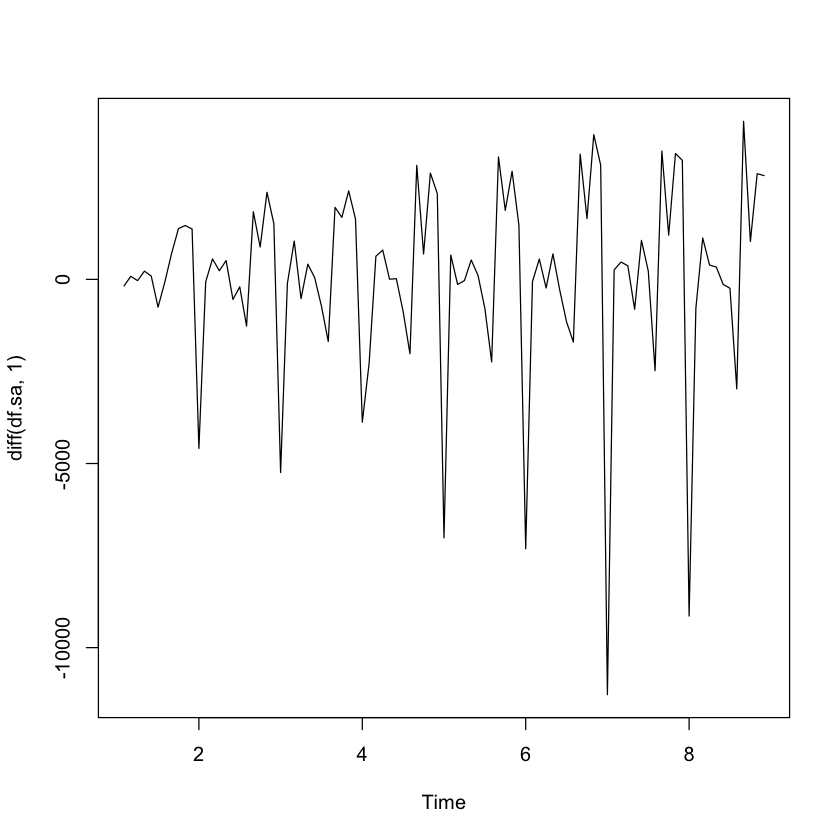

In [155]:
plot( diff( df.sa, 1))

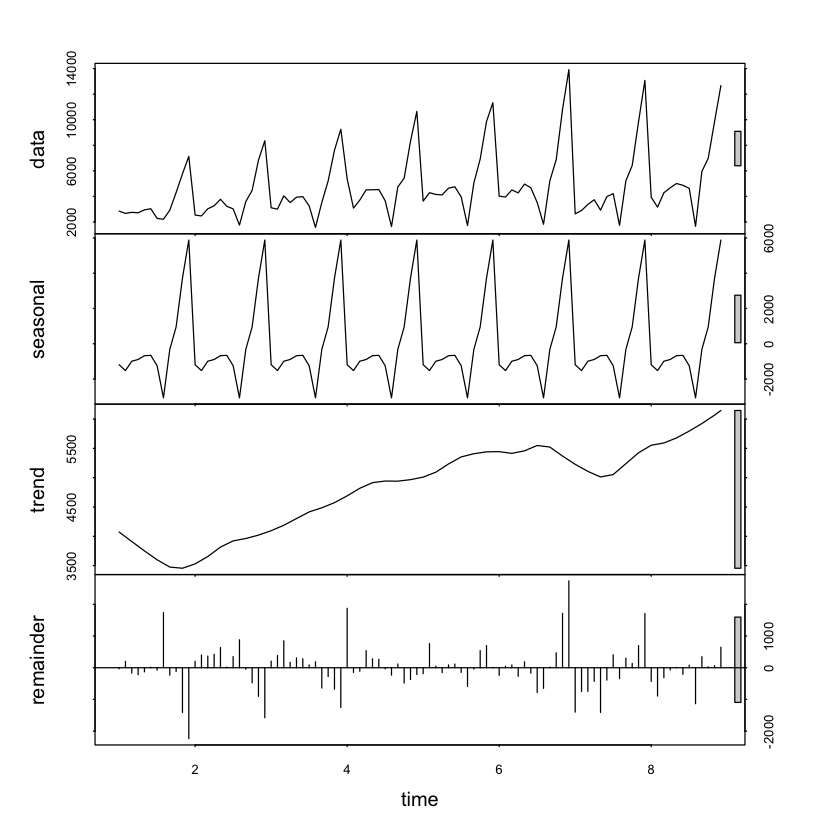

In [156]:
plot( b )

In [157]:
ndiffs( df.sa )

[1] 1

In [150]:
forecast( fit, 6)

      Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
Jul 8       4281.265  3283.3119  5279.218  2755.0276  5807.502
Aug 8       1902.489   805.4339  2999.545   224.6879  3580.291
Sep 8       5283.634  4167.0256  6400.242  3575.9289  6991.339
Oct 8       6604.194  5483.5526  7724.836  4890.3209  8318.067
Nov 8      10179.780  9058.3000 11301.261  8464.6241 11894.937
Dec 8      13365.828 12244.1730 14487.484 11650.4045 15081.252